In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# Creating a simple linear dataset
np.random.seed(42)
X = np.random.rand(1000, 1) * 10  # Features
y = 3 * X.squeeze() + 5 + np.random.randn(1000) * 2  # Linear relationship with noise

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Initial Model MSE: {mse:.4f}")


Initial Model MSE: 3.4295


Model MSE after Drift: 3.7238


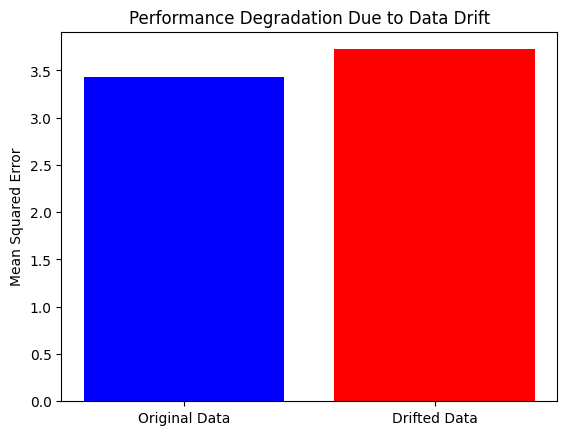

In [ ]:
# Introduce drift: Change data distribution
X_drift = np.random.rand(200, 1) * 15  # Increased range (previous max was 10)
y_drift = 3 * X_drift.squeeze() + 5 + np.random.randn(200) * 2  # Same relationship

# Make new predictions
y_drift_pred = model.predict(X_drift)

# Evaluate performance on drifted data
mse_drift = mean_squared_error(y_drift, y_drift_pred)
print(f"Model MSE after Drift: {mse_drift:.4f}")

# Compare old vs new errors
plt.bar(["Original Data", "Drifted Data"], [mse, mse_drift], color=["blue", "red"])
plt.ylabel("Mean Squared Error")
plt.title("Performance Degradation Due to Data Drift")
plt.show()


In [ ]:
# dashboard --> which does this tracking realtime : Promethus, Evidently AI, Whylabs, Arize AI and Seldon , Grafana, MLFLOW

#  which one are open source



In [ ]:
# Note: you may need to restart the kernel to use updated packages.
%pip install 'whylogs[viz]'

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 534.0/534.0 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.4 MB/s eta 0:00:00
  Created wheel for pybars3: filename=pybars3-0.9.7-py3-none-any.whl size=14082 sha256=a3c9a5acc10fdc20aa0b354cb00230bbdad187eb54de91bd2b4b883f032bc5d0
  Stored in directory: /root/.cache/pip/wheels/64/b1/3d/cfac19f3ddd92f19e630a97106a66d1a92ffd30e4e95ca5e45
  Created wheel for PyMeta3: filename=PyMeta3-0.5.1-py3-none-any.whl size=16450 sha256=3ae62991551bdab5a27c74998cb02b3acc655008a1a4a26bd1963327b257106f
  Stored in directory: /root/.cache/pip/wheels/67/18/5a/5a3a19ff18c8118a8dd11204dcde08349c2bbbdd77ac45b6a7
Success

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # Disabling false positive warning

# this is the same data as encountered in http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
url = "https://whylabs-public.s3.us-west-2.amazonaws.com/whylogs_examples/WineQuality/winequality-red.csv"
wine = pd.read_csv(url)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
cond_reference = (wine['alcohol']<=11)
wine_reference = wine.loc[cond_reference]

cond_target = (wine['alcohol']>11)
wine_target = wine.loc[cond_target]

In [ ]:
ixs = wine_target.iloc[100:110].index
wine_target.loc[ixs,'citric acid'] = None

In [ ]:
import pandas as pd

bins = (2, 6.5, 8)
group_names = ['bad', 'good']

wine_reference['quality'] = pd.cut(wine_reference['quality'], bins = bins, labels = group_names)
wine_target['quality'] = pd.cut(wine_target['quality'], bins = bins, labels = group_names)


In [ ]:
import whylogs as why
result = why.log(pandas=wine_target)
prof_view = result.view()

In [ ]:
result_ref = why.log(pandas=wine_reference)
prof_view_ref = result_ref.view()

In [ ]:
from whylogs.viz import NotebookProfileVisualizer

visualization = NotebookProfileVisualizer()
visualization.set_profiles(target_profile_view=prof_view, reference_profile_view=prof_view_ref)

In [ ]:
visualization.profile_summary()

In [ ]:
visualization.summary_drift_report()

In [ ]:
visualization.double_histogram(feature_name=["alcohol","chlorides"])

In [ ]:
visualization.distribution_chart(feature_name="quality")


In [ ]:
visualization.feature_statistics(feature_name=["density","alcohol","chlorides"], profile="target")


In [ ]:
# goes to the LEAD DS, then you may either automate--> based on their recommendation

# the data which is drifting--> you dont' predict for it --> rules for it --> ceil it--> 11> --> 11
# DS--. data may go as an input data--> target data---> retraingin of your model ?

# You can automate based on Lead DS--> that if it drifts--> you will print(data has drifted)



In [ ]:
#please run the codes--> Working break: 21:33-->

# can you answer , whether whylabs/evidently can be setup as a dashboard realtime, if yes then how

# Load production data
# Log dataset profile
# Send to WhyLabs using something like below:
writer = WhyLabsWriter()
profile.writer("whylabs").write()
# can you do it realtime, # also where are the logs saved, can you integrate it with a database